Model Score: 8858.516366860582


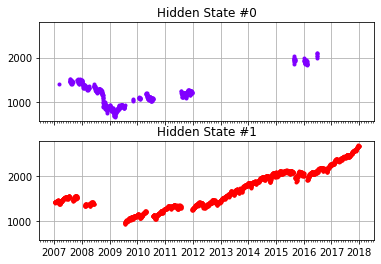

<Figure size 1440x576 with 0 Axes>

Pickling HMM model...
...HMM model pickled.


In [10]:
# regime_hmm_train.py
# this file encompasses the fitting of a Gaussian Hidden Markov Model to
# a large period of the S&P500 returns.

from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns


def obtain_prices_df(ticker, start_date, end_date):
    """
    Obtain the prices DataFrame from the CSV file,
    filter by the end date and calculate the
    percentage returns.
    """
    df = web.DataReader(name= ticker , data_source= 'yahoo' , start = start_date , end= end_date )
    df['Return'] = df['Close']/df['Close'].shift(1) - 1  
    df["Return"] = df["Adj Close"].pct_change()
    df = df[: new_format_end_date.strftime("%Y-%m-%d")]
    df.dropna(inplace=True)
    return df


def plot_in_sample_hidden_states(hmm_model, df):
    """
    Plot the adjusted closing prices masked by
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    # Create the correctly formatted plot
    fig, axs = plt.subplots(hmm_model.n_components, sharex=True, sharey=True)
    colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], df["Adj Close"][mask], ".", linestyle="none", c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.figure(figsize = (20,8))
    plt.show()


if __name__ == "__main__":
    # Hides deprecation warnings for sklearn
    warnings.filterwarnings("ignore")

    # Create the SPY dataframe from the Yahoo Finance CSV
    # and correctly format the returns for use in the HMM
    pickle_path = "hmm_pkl.pkl"
    start_date = '2007-1-1'
    end_date = '2017-12-29'
    new_format_end_date = datetime.datetime(2017,12,29)
    ticker = '^GSPC'
    RUA = obtain_prices_df(ticker, start_date, end_date)
    rets = np.column_stack([RUA["Return"]])
    # replce both NaN and Inf with 0
    #rets[np.isinf(rets)|np.isnan(rets)] = 0
    # reshape array
    #rets = rets.reshape(-1,1)

    # Create the Gaussian Hidden markov Model and fit it
    # to the SPY returns data, outputting a score
    hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000).fit(rets)
    print("Model Score:", hmm_model.score(rets))

    # Plot the in sample hidden states closing values
    plot_in_sample_hidden_states(hmm_model, RUA)

    print("Pickling HMM model...")
    pickle.dump(hmm_model, open(pickle_path, "wb"))
    print("...HMM model pickled.")


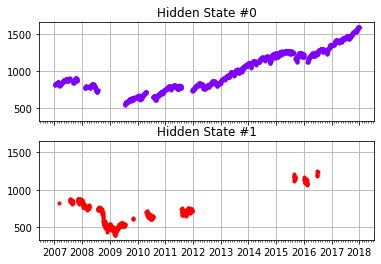

<Figure size 1440x576 with 0 Axes>

In [2]:
plot_in_sample_hidden_states(hmm_model, RUA)

In [11]:
pickle_path = "hmm_pkl.pkl"
start_date = '2007-1-1'
end_date = '2018-1-1'
new_format_end_date = datetime.datetime(2018,1,1)
ticker = '^RUA'
RUA = obtain_prices_df(ticker, start_date, end_date)
rets = np.column_stack([RUA["Return"]])

In [12]:
hidden_states = hmm_model.predict(rets)
date_list = RUA.index
states_dates = list(zip(date_list, hidden_states))
states_df = pd.DataFrame(states_dates, columns=['Date', 'State'])
states_df.to_csv('states_df.csv')

In [13]:
df = states_df

In [9]:
df[df['Date'] == '2007-01-04']['State'].values[0]

0

In [14]:
df

,Date,State
0,2007-01-04,1
1,2007-01-05,1
2,2007-01-08,1
3,2007-01-09,1
4,2007-01-10,1
...,...,...
2763,2017-12-22,1
2764,2017-12-26,1
2765,2017-12-27,1
2766,2017-12-28,1
